# Implementation of Logistic Regression

## Import Libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [91]:
print((titanic_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [92]:
print("# Total number of row and column in dataset: %s, %s" % (len(titanic_data.index), len(titanic_data.columns)))

# Total number of row and column in dataset: 891, 12


# Analyzing Data

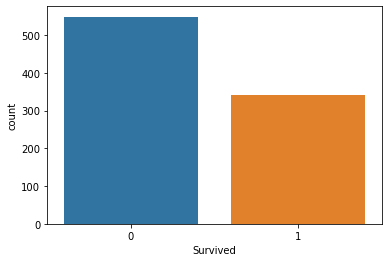

In [93]:
sns.countplot(x="Survived", data=titanic_data)

In [94]:
# 0 means passenger who had not survived

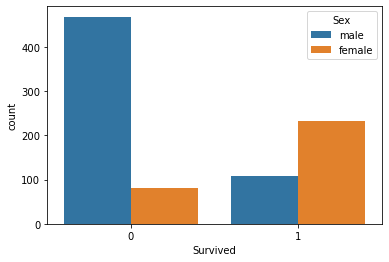

In [95]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

In [96]:
# # O means male, female who had not survived

In [127]:
temp = titanic_data['Pclass'].head(10)
print(temp)


0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


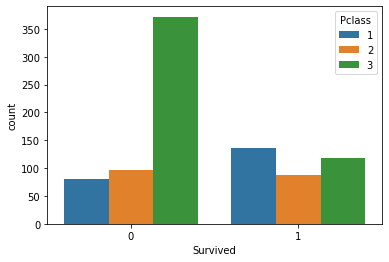

In [98]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

In [99]:
# O means who had not survived from which class

In [100]:
# # Analysis on Age column

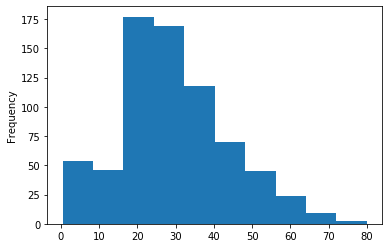

In [101]:
titanic_data['Age'].plot.hist()

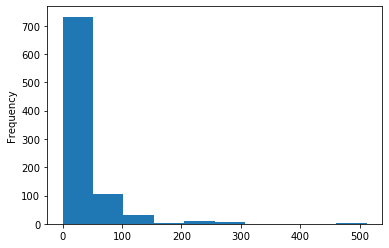

In [102]:
titanic_data['Fare'].plot.hist()

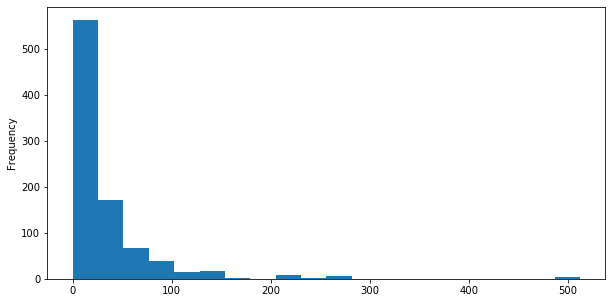

In [103]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [104]:
print((titanic_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


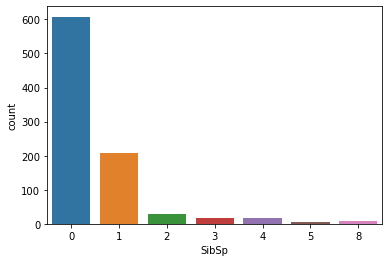

In [105]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [106]:
# Data Wrangling is to remove null or empty data, cleaning data set

In [107]:
print((titanic_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [108]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [109]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
sns.heatmap(titanic_data.isnull(), yticklabels==False)

NameError: name 'yticklabels' is not defined

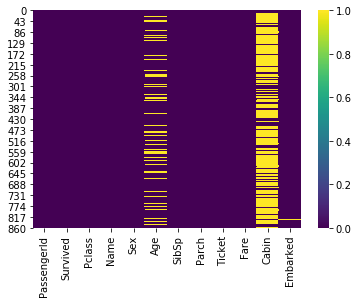

In [111]:
sns.heatmap(titanic_data.isnull(), cmap="viridis")

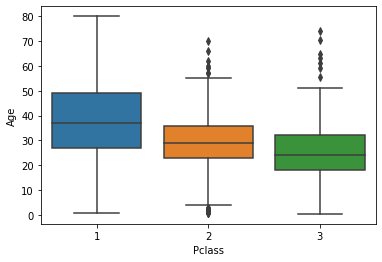

In [112]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

# either drop that row or fill some value where value is null

In [113]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [118]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


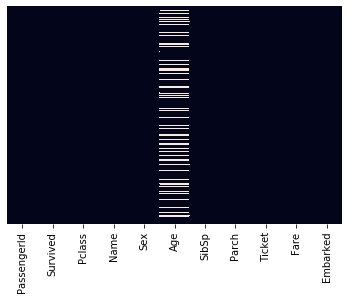

In [116]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [119]:
titanic_data.drop("Age", axis=1, inplace=True)

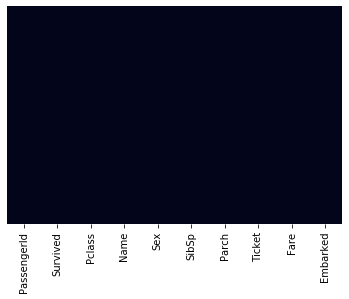

In [120]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [121]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [117]:
titanic_data.drop("Embarked", axis=1, inplace=True)
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [125]:
pd.get_dummies(titanic_data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [123]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [128]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [129]:
pd.get_dummies(titanic_data['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [130]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [131]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [132]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [133]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [134]:
titanic_data = pd.concat([titanic_data,sex, embark, pcl], axis=1)

In [135]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,1,0,1,0,1


In [138]:
titanic_data.drop(['Sex', 'Embarked', 'Name', 'PassengerId', 'Ticket'], axis=True, inplace=True)

In [139]:
titanic_data.head(5)

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,1,0,7.2500,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,1,0,0
4,0,3,0,0,8.0500,1,0,1,0,1


In [140]:
titanic_data.drop(['Pclass'], axis=True, inplace=True)

In [141]:
titanic_data.head(5)

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,0,1,0,7.2500,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0
2,1,0,0,7.9250,0,0,1,0,1
3,1,1,0,53.1000,0,0,1,0,0
4,0,0,0,8.0500,1,0,1,0,1


## Train and Test

In [151]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [152]:
titanic_data.head(5)

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,0,1,0,7.2500,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0
2,1,0,0,7.9250,0,0,1,0,1
3,1,1,0,53.1000,0,0,1,0,0
4,0,0,0,8.0500,1,0,1,0,1


In [153]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logmodel = LogisticRegression()

In [157]:
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predictions = logmodel.predict(X_test)

In [159]:
from sklearn.metrics import classification_report

In [160]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.86      0.82       174\n           1       0.76      0.64      0.69       121\n\n    accuracy                           0.77       295\n   macro avg       0.77      0.75      0.75       295\nweighted avg       0.77      0.77      0.77       295\n'

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
confusion_matrix(y_test, predictions)

array([[150,  24],
       [ 44,  77]])

In [164]:
from sklearn.metrics import accuracy_score

In [165]:
accuracy_score(y_test, predictions)

0.7694915254237288

## Collecting Data

## Accuracy Check